In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# do we have GPU?
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

[]

# Artificial Neural Nets (ANNs)

The following is a template for training an ANN using Keras with the Tensorflow backend.  There are several cells where you will have to fill in the missing steps.  Your activity will also require you to make some adjustments to the neural net parameters too.

In [3]:
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D

In [4]:
from keras.layers import MaxPooling2D

In [5]:
from keras.models import Model

In [6]:
from keras.callbacks import EarlyStopping

In [7]:
from keras import optimizers

In [8]:
pwd

'/home/jupyter/2021/PHYS 395/Week 9'

## Read in data

In [10]:
import glob

In [11]:
flist=glob.glob('Ising/*/*.dat')
len(flist)

7000

In [13]:
flist[:10]

['Ising/T2.28/img369.dat',
 'Ising/T2.28/img126.dat',
 'Ising/T2.28/img231.dat',
 'Ising/T2.28/img315.dat',
 'Ising/T2.28/img463.dat',
 'Ising/T2.28/img312.dat',
 'Ising/T2.28/img464.dat',
 'Ising/T2.28/img8.dat',
 'Ising/T2.28/img78.dat',
 'Ising/T2.28/img418.dat']

In [24]:
X = []   # the 2D image files
Y = []   # labels for each image. T<=Tc, y=1 else y=0
Temps = []   # Temperature that each image was taken at


Tc= 2.27
# write code to loop and read in all the image files and generate labels
for f in flist: 
        x = genfromtxt(f)
        L= len(x)
        x = reshape(x, (L,L,1))
        X.append(x)
        
        #get temperature from file name
        T= float(f.split('/')[1][1:])
        
        Temps.append(T)
        
        if T <= Tc:
            Y.append(1)
        else:
            Y.append(0)
# convert X, Y, Temps into arrays
X= array(X)
Y= array(Y)
Temps= array(Temps)

# print out shape of X, Y.  They should be of shape (Nimage, L, L, 1), (Nimage,)
print(shape(X),shape(Y))

(7000, 32, 32, 1) (7000,)


How many images total were there?  and what is the size L of each image?

There are 7000 images of size of 32x32


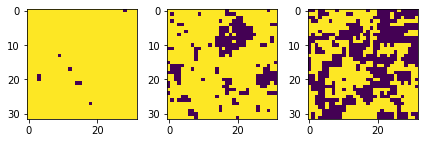

In [20]:
# Make image plots of sevaral snapshots: i) T < Tc  ii) T ~ Tc and iii) T > Tc

#T < Tc

ii = where(Temps == 1.5)[0]
subplot(131)
imshow(X[ii[10],:,:,0])

# T ! Tc
ii = where(Temps == 2.27)[0]
subplot(132)
imshow(X[ii[10],:,:,0])


# T > Tc
ii = where(Temps == 3.0)[0]
subplot(133)
imshow(X[ii[10],:,:,0])

tight_layout()

Increasement in magnetization as the tempererature gets lower

## Create Training, Validation, Test data

Split your data so that 70% is in the training set and 15% are in the validation and test sets respectively.

In [29]:
# Fill in the missing code to split the data

Ntrain = int(0.7*len(Y))
Nvalid = int(0.15*len(Y))
Ntest = len(Y)-Ntrain-Nvalid

# shuffle the original data so that the distribution of labels will be similar across the splittings
idxs = arange(len(Y))
shuffle(idxs)

# make your splits into an (xtrain, ytrain, Ttrain), (xvalid, yvalid, Tvalid), (xtest, ytest, Ttest)
xtrain = X[idxs[:Ntrain]]
ytrain = Y[idxs[:Ntrain]]
Ttrain = Temps[idxs[:Ntrain]]

xvalid = X[idxs[Ntrain:Ntrain+Nvalid]]
yvalid = Y[idxs[Ntrain:Ntrain+Nvalid]]
Tvalid = Temps[idxs[Ntrain:Ntrain+Nvalid]]

xtest = X[idxs[-Ntest:]]
ytest = Y[idxs[-Ntest:]]
Ttest = Temps[idxs[-Ntest:]]

print(shape(xtrain),shape(xvalid),shape(xtest))

(4900, 32, 32, 1) (1050, 32, 32, 1) (1050, 32, 32, 1)


## Augment the training data  (Run only when instructed to in the activity guide)

For the 2D square Ising model, the system is symmetric under left->right and up->down flips.  Add these symmetry operations to triple your training data.

In [30]:
# Loop over training data and add the following 2 new images
# you need to append these flipped images to your training data.
# you could convert your training sets back to lists and do append as
# as a suggestion

# Fill in the necessary code to complete this task

for i in range(Ntrain)

        xLeft_Right = xtrain[i][:,::-1,:]
        xUp_Down = xtrain[i][::-1, :, :]
        # add these to your xtrain set and don't forget to also add in their labels to the ytrain

SyntaxError: invalid syntax (<ipython-input-30-64912749c73f>, line 8)

# Dense Neural Network

In [31]:
#DNN

L = 32 # set the value of the image size

inputs = Input(shape=(L,L,1))   # input layer.  Shape is the shape of the input

x = Flatten()(inputs)      # need to flatten the 2D into 1D vector of L*L elements

x = Dense(512)(x)              # first dense layer has 512 neurons
x = Activation('relu')(x)      # ReLU activation
x = Dropout(0.5)(x)            # Dropout layer - drops neurons at random at training to minimize overfitting

x = Dense(256)(x)             # 2nd dense layer block, has 256 neurons
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(1)(x)                   # Final output neuron (single neuron for binary classification)
outputs = Activation('sigmoid')(x)      # sigmoid so that output is (0 -> 1)

model = Model(inputs = inputs, outputs = outputs)      # puts all the layers together into a Keras Model

sgd = optimizers.SGD(lr=0.01)         # choose stochastic gradient descent.  lr = learning rate

# model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=sgd,loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


# Early stopping criterion for stopping the fitting.  Monitor's the validation loss and will stop
# when the number of epochs where it increases = 'patience'
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0   

This model has 656,385 parameters

In [32]:
#  fit the model
history = model.fit(xtrain, ytrain, validation_data=[xvalid, yvalid], batch_size=32, epochs =20,callbacks=[early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 4900 samples, validate on 1050 samples
Epoch 1/20
4900/4900 [==============================] - 3s 580us/step - loss: 0.5287 - accuracy: 0.7537 - val_loss: 0.4892 - val_accuracy: 0.7705
Epoch 2/20
4900/4900 [==============================] - 3s 550us/step - loss: 0.4524 - accuracy: 0.7937 - val_loss: 0.4505 - val_accuracy: 0.7886
Epoch 3/20
4900/4900 [==============================] - 3s 534us/step - loss: 0.4359 - accuracy: 0.7990 - val_loss: 0.4409 - val_accuracy: 0.7981
Epoch 4/20
4900/4900 [==============================] - 3s 531us/step - loss: 0.4347 - accuracy: 0.7998 - val_loss: 0.4741 - val_accuracy: 0.7790
Epoch 5/20
4900/4900 [==============================] - 3s 551us/step - loss: 0.4231 - accuracy: 0.8043 - val_loss: 0.4491 - val_accuracy: 0.7914
Epoch 6/20
4900/4900 [==============================] - 3s 564us/step - loss: 0.4175 - accuracy: 0.8080 - val_loss: 0.4422 - val_accuracy: 0.7962


In [33]:
# Evaluate the fitted model on the test set.  What is the accuracy and loss?
model.evaluate(xtest, ytest)

1050/1050 [==============================] - 0s 195us/step


[0.43059472311110725, 0.7952380776405334]

We have ~80% accuracy

In [36]:
# predict the probabilites of the category on the test set
yp = model.predict(xtest)

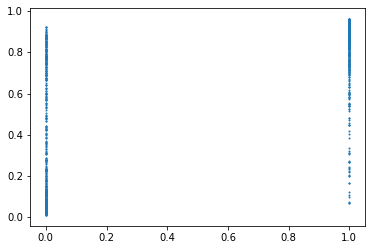

In [37]:
scatter(ytest,yp,s=1)

So output if our neural net is P(Y=1), a probability.

In [38]:
# Fill in code to make a plot of the average probability vs Temp on the test set

Ts= unique(Temps)
pavg =[]

for T in Ts:
    ii = where(Ttest==T)[0] #all idxs where temperature at T
    pavg.append(mean(yp[ii]))

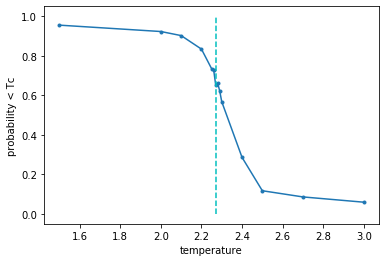

In [42]:
plot(Ts,pavg,'.-')
ylabel('probability < Tc')
xlabel("temperature")

plot([2.27,2.27],[0,1],'c--')

the plot shows that our DNN can predict reasonablywell wheather an image at a given temperature is above or below

# Convolutional Neural Network (CNN)

In [43]:
# model definitions

inputs = Input(shape=(L,L,1))

x = Conv2D(16, (2,2), name='C1d')(inputs)                # first convolutional layer block has 16 2x2 filters
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)      # downsamples by 1/2 by taking max value in each 2x2 block

x = Conv2D(16, (2,2))(x)                    # 2nd convolutional layer block has 16 2x2 filters
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(32, (2,2))(x)                  # 3rd convolutional layer has 32 2x2 filters
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten()(x)                         # flatten the extracted featureset from CNN layers # how many are there?


x = Dense(256)(x)                       # Last block carries out the classification using a Dense layer
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(1)(x)                         # Final output neuron as before
outputs = Activation('sigmoid')(x)

model = Model(inputs = inputs, outputs = outputs)

sgd = optimizers.SGD(lr=0.01)
# model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=sgd,loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
C1d (Conv2D)                 (None, 31, 31, 16)        80        
_________________________________________________________________
activation_7 (Activation)    (None, 31, 31, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1040      
_________________________________________________________________
activation_8 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0   

In [44]:
#get trained filters from 1st Conv2D layer

filters = model.get_layer("C1d").get_weights()
shape(filters)

(2,)

In [45]:
# fit model
history = model.fit(xtrain, ytrain, validation_data=[xvalid, yvalid], batch_size=32, epochs =20,callbacks=[early_stopping], verbose=1)

Train on 4900 samples, validate on 1050 samples
Epoch 1/20
4900/4900 [==============================] - 7s 1ms/step - loss: 0.6162 - accuracy: 0.6647 - val_loss: 0.5114 - val_accuracy: 0.7971
Epoch 2/20
4900/4900 [==============================] - 6s 1ms/step - loss: 0.4490 - accuracy: 0.7967 - val_loss: 0.4263 - val_accuracy: 0.7876
Epoch 3/20
4900/4900 [==============================] - 5s 1ms/step - loss: 0.4155 - accuracy: 0.7980 - val_loss: 0.4215 - val_accuracy: 0.8000
Epoch 4/20
4900/4900 [==============================] - 5s 1ms/step - loss: 0.4020 - accuracy: 0.8078 - val_loss: 0.4787 - val_accuracy: 0.7590
Epoch 5/20
4900/4900 [==============================] - 5s 1ms/step - loss: 0.3961 - accuracy: 0.8118 - val_loss: 0.4320 - val_accuracy: 0.7752
Epoch 6/20
4900/4900 [==============================] - 5s 1ms/step - loss: 0.3919 - accuracy: 0.8092 - val_loss: 0.3941 - val_accuracy: 0.7971
Epoch 7/20
4900/4900 [==============================] - 5s 1ms/step - loss: 0.3834 - acc

In [46]:
model.evaluate(xtest, ytest)

1050/1050 [==============================] - 0s 286us/step


[0.38278593852406456, 0.8161904811859131]

In [47]:
py = model.predict(xtest)

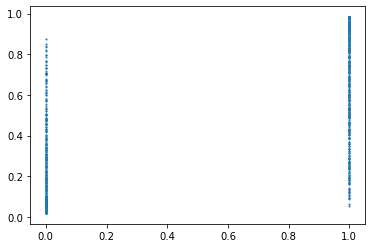

In [48]:
scatter(ytest,py,s=1)

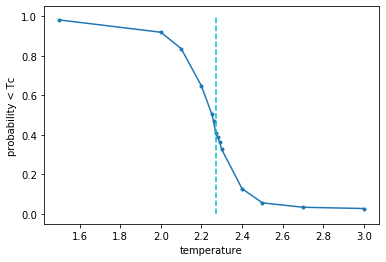

In [51]:
# make plot of average probability vs temp for test set

# Fill in code to make a plot of the average probability vs Temp on the test set

Ts= unique(Temps)
pavg =[]

for T in Ts:
    ii = where(Ttest==T)[0] #all idxs where temperature at T
    pavg.append(mean(py[ii]))
    
plot(Ts,pavg,'.-')
ylabel('probability < Tc')
xlabel("temperature")

plot([2.27,2.27],[0,1],'c--')

It looks better thatn DNN 

(2, 2, 1, 16)


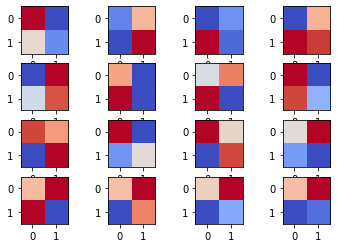

In [116]:
# make some plots showing the learned 2x2 filters.
filters = model.get_layer("C1d").get_weights()
print(shape(filters[0]))

for i in range(16):
    subplot(4,4,i+1)
    imshow(filters[0][:,:,0,i], cmap='coolwarm')

# non-Ising model

Use the fitted CNN (or DNN if you want) to make predictions on data from configurations generated by a unknown model that displays a phase transition.  See activity guide for instructions.

In [62]:
import glob

In [108]:
#flist=glob.glob('img/*.dat')
#len(flist)
#flist[:10]


In [109]:
L = 32  # images are LxL.  I opened one to figure out L.

Xn = []   # the 2D image files
Tn = []   # Temperature that each image was taken at

Ts = [2.0, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
N = 500   # there are 501 .dat files in each Temperature


for T in Ts:
    for i in range(N):
        x = genfromtxt('nonIsing/T'+str(T)+'/img'+str(i+1)+'.dat')
        x = reshape(x, (L,L,1))
        Xn.append(x)
        Tn.append(T)
# convert X, Y, Temps into arrays
Xn = array(Xn)
Tn = array(Tn)
# print out shape of X.  They should be of shape (Nimage, L, L, 1)
print(shape(Xn))

(6000, 32, 32, 1)


In [101]:
py = model.predict(Xn)

Text(0.5, 0, 'T')

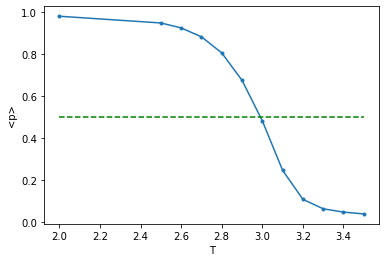

In [95]:
# Fill in code to make a plot of the average probability vs Temp on the test set
Ts = unique(Tn)
pavg = []
for T in Ts:
    ii = where(Tn==T)[0]
    pavg.append(mean(py[ii]))
plot(Ts, pavg, '.-')
plot([2.0, 3.5], [0.5, 0.5], 'g--')
ylabel('<p>')
xlabel('T')